# Project Spaceship Titaninc Kaggle

## Bước 1: Import thư viện

In [1]:
#load Thư viện
import sys  # Kiểm tra phiên bản Python
print("Python version: {}". format(sys.version))

import pandas as pd # Xử lý dữ liệu dạng bảng (DataFrame).
print("pandas version: {}". format(pd.__version__))

import matplotlib  # Vẽ biểu đồ khoa học
print("matplotlib version: {}". format(matplotlib.__version__))

import numpy as np # Tính toán khoa học, xử lý mảng số học
print("NumPy version: {}". format(np.__version__))

import scipy as sp # Công cụ toán học nâng cao
print("SciPy version: {}". format(sp.__version__)) 

import IPython
from IPython import display # Hiển thị dữ liệu đẹp hơn trong Jupyter Notebook
print("IPython version: {}". format(IPython.__version__)) 

import sklearn # Các thuật toán Machine Learning
print("scikit-learn version: {}". format(sklearn.__version__))

import random # Làm việc với các số ngẫu nhiên
import time # Xử lý thời gian

# Tắt cảnh báo không quan trọng
import warnings
warnings.filterwarnings('ignore')

Python version: 3.12.3 | packaged by conda-forge | (main, Apr 15 2024, 18:20:11) [MSC v.1938 64 bit (AMD64)]
pandas version: 2.2.2
matplotlib version: 3.9.2
NumPy version: 1.26.4
SciPy version: 1.13.1
IPython version: 8.27.0
scikit-learn version: 1.5.1


In [2]:
#Common Model Algorithms
from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process
from xgboost import XGBClassifier

#Common Model Helpers
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

#Visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
from pandas.plotting import scatter_matrix



## Bước 2: Đọc dữ liệu

In [3]:

# Đọc file dữ liệu từ Kaggle
data_raw = pd.read_csv('./data/train.csv')
data_val = pd.read_csv('./data/test.csv')

# Sao chép dữ liệu để làm sạch mà không ảnh hưởng đến bản gốc
data1 = data_raw.copy(deep=True)

# Danh sách chứa cả tập train và test (tiện xử lý dữ liệu)
data_cleaner = [data1, data_val]

In [4]:
data_raw.head(4)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False


In [5]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [6]:
#  Kiểu tra trùng dữ liệu
print(f'Duplicates in train set: {data_raw.duplicated().sum()}, ({np.round(100*data_raw.duplicated().sum()/len(data_raw),1)}%)')
print('')
print(f'Duplicates in test set: {data_val.duplicated().sum()}, ({np.round(100*data_val.duplicated().sum()/len(data_val),1)}%)')

Duplicates in train set: 0, (0.0%)

Duplicates in test set: 0, (0.0%)


## Bước 3: Mô tả dữ liệu

In [7]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


## Chú thích cột
- `PassengerId`: Mã định danh khách hàng gggg là nhóm khác hàng đi cùng nhau có thể là người nhà
- `HomePlanet`: Hành tinh nơi hành khách khởi hành
- `CryoSleep`: Biến Boolean cho biết hành khách có chọn trạng thái ngủ đông (suspended animation) trong suốt chuyến đi hay không. Nếu True, họ sẽ bị giới hạn trong cabin của mình.
- `Cabin`:Số cabin của hành khách, có dạng deck/num/side, trong đó:
    * deck: Tầng của con tàu (ví dụ: A, B, C, ...).
    * num: Số phòng.
    * side: Vị trí của cabin, có thể là P (Port - mạn trái) hoặc S (Starboard - mạn phải).
- `Destination`: Hành tinh mà hành khách sẽ đến.
- `Age`: Tuổi của hành khách
- `VIP`: Biến Boolean thể hiện liệu hành khách có trả tiền cho dịch vụ VIP hay không
- `RoomService`, `FoodCourt`, `ShoppingMall`, `Spa`, `VRDeck`: Các cột này thể hiện số tiền mà hành khách đã chi tiêu cho từng dịch vụ cao cấp trên tàu Spaceship Titanic.
- `Name`: Họ và tên của hành khách.

- `Transported`: Biến mục tiêu (target), cho biết hành khách có bị "dịch chuyển" đến một chiều không gian khác hay không. Đây là nhãn mà bạn cần dự đoán.

- num: `Age`,`RoomService`, `FoodCourt`, `ShoppingMall`, `Spa`, `VRDeck`
- cat: `HomePlanet`,`CryoSleep`,`Destination`,`VIP`,`Transported`
- Qua : `Cabin`,`PassengerId`,`Cabin`,`Name`

In [8]:
# Expenditure features
exp_feats=['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

# Categorical features
cat_feats=['HomePlanet', 'CryoSleep', 'Destination', 'VIP']

# Qualitative features
qual_feats=['PassengerId', 'Cabin' ,'Name']

In [9]:

def convert_cat(df,cols):
    for col in cols:
        df[col] = df[col].astype('category')
for data in data_cleaner:
    convert_cat(data,cat_feats)

In [10]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   PassengerId   8693 non-null   object  
 1   HomePlanet    8492 non-null   category
 2   CryoSleep     8476 non-null   category
 3   Cabin         8494 non-null   object  
 4   Destination   8511 non-null   category
 5   Age           8514 non-null   float64 
 6   VIP           8490 non-null   category
 7   RoomService   8512 non-null   float64 
 8   FoodCourt     8510 non-null   float64 
 9   ShoppingMall  8485 non-null   float64 
 10  Spa           8510 non-null   float64 
 11  VRDeck        8505 non-null   float64 
 12  Name          8493 non-null   object  
 13  Transported   8693 non-null   bool    
dtypes: bool(1), category(4), float64(6), object(3)
memory usage: 654.2+ KB


In [11]:
data1.shape,data1.shape

((8693, 14), (8693, 14))

In [12]:
data1.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [13]:
data1.describe(include='category')

,HomePlanet,CryoSleep,Destination,VIP
count,8492,8476,8511,8490
unique,3,2,3,2
top,Earth,False,TRAPPIST-1e,False
freq,4602,5439,5915,8291


In [14]:
def display_pd_mv(df):
    numMiss = df.isna().sum()
    mv_df = pd.DataFrame(numMiss,columns=["Count miss"])
    mv_df['raito_miss'] = numMiss/len(df)
    return mv_df
for data in data_cleaner:
    display.display_html(display_pd_mv(data))

,Count miss,raito_miss
PassengerId,0,0.000000
HomePlanet,201,0.023122
CryoSleep,217,0.024963
Cabin,199,0.022892
Destination,182,0.020936
Age,179,0.020591
VIP,203,0.023352
RoomService,181,0.020821
FoodCourt,183,0.021051
ShoppingMall,208,0.023927


,Count miss,raito_miss
PassengerId,0,0.000000
HomePlanet,87,0.020341
CryoSleep,93,0.021744
Cabin,100,0.023381
Destination,92,0.021510
Age,91,0.021277
VIP,93,0.021744
RoomService,82,0.019172
FoodCourt,106,0.024784
ShoppingMall,98,0.022913


## Bước 4: Trực quan dữ liệu (EDA):


### Trực quan dữ liệu cột Categorical
* Categorical: `HomePlanet`,`CryoSleep`,`Destination`,`VIP`,`Transported`

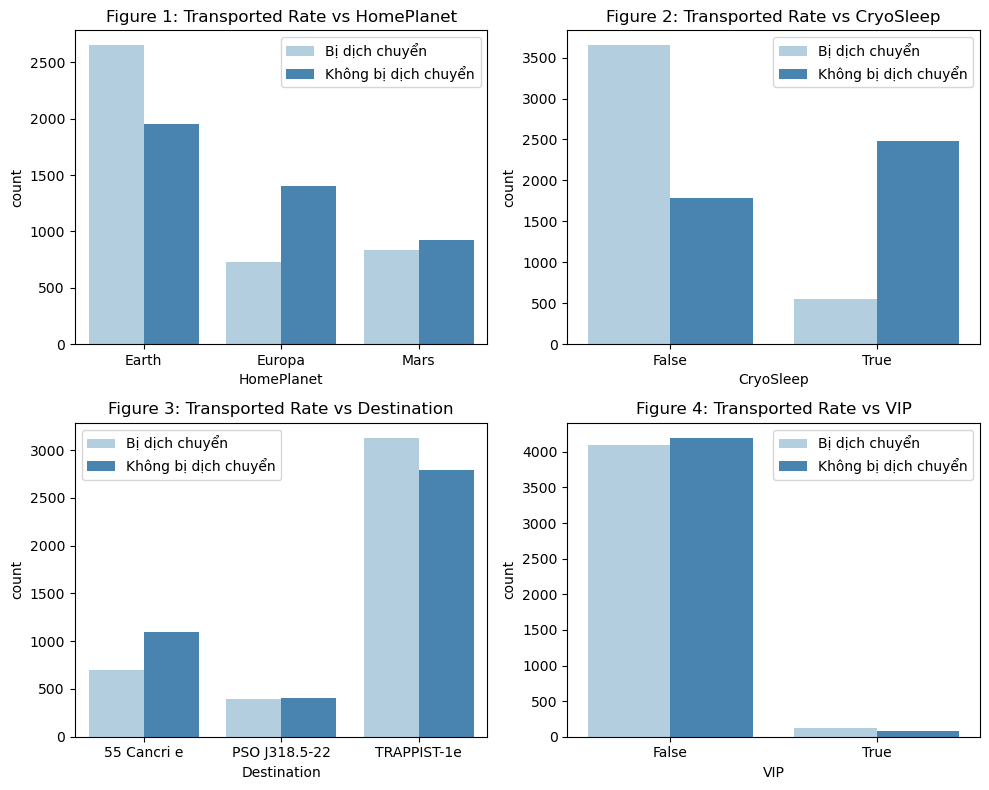

In [15]:
cols = ["HomePlanet","CryoSleep","Destination","VIP"]
n_rows = 2
n_cols = 2

fig,ax = plt.subplots(n_rows,n_cols,figsize=(n_cols*5,n_rows*4))

for r in range(0,n_rows):
    for c in range(0,n_cols):
        i = r*n_cols + c #index to loop through list "cols"
        if i < len(cols):
            ax_i = ax[r,c]
            sns.countplot(data=data1,x=cols[i],hue="Transported",palette = "Blues",ax=ax_i)
            ax_i.set_title(f"Figure {i+1}: Transported Rate vs {cols[i]}")
            ax_i.legend(title='',loc = 'best',labels=["Bị dịch chuyển","Không bị dịch chuyển"])
            
plt.tight_layout()
plt.show()

- Chú thích:
    * Những hành khách sống ở `Earth` có tỉ lệ bị dịch chuyển cao hơn
    * Những hành khách trong trạng thái đông có tỉ lệ bị dịch chuyển thấp
    * VIP Thì không ảnh hưởng gì mấy tới việc có bị dịch chuyển hay không
    * Có rất hành không sữ dụng VIP


### Trực quan dữ liệu cột Num
* Num:`Age`,`RoomService`, `FoodCourt`, `ShoppingMall`, `Spa`, `VRDeck`

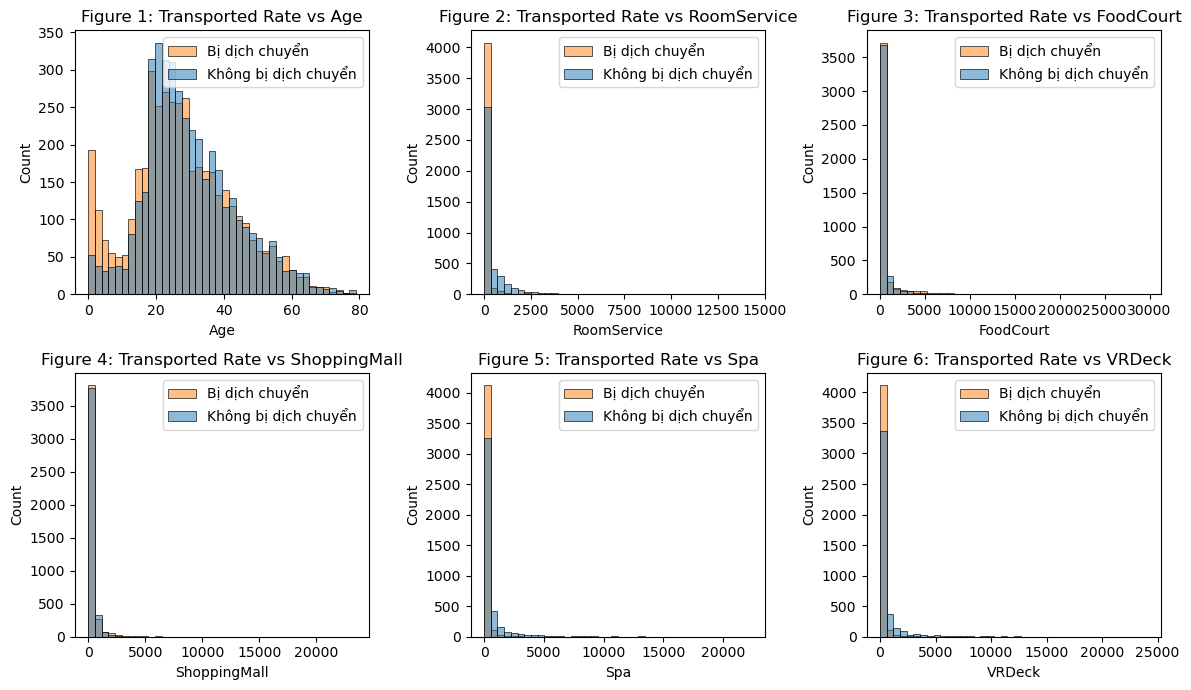

In [16]:
cols = ["Age","RoomService","FoodCourt","ShoppingMall","Spa","VRDeck"]
n_rows = 2
n_cols = 3

fig,ax = plt.subplots(n_rows,n_cols,figsize=(n_cols*4,n_rows*3.5))

for r in range(0,n_rows):
    for c in range(0,n_cols):
        i = r*n_cols + c #index to loop through list "cols"
        if i < len(cols):
            ax_i = ax[r,c]
            sns.histplot(data=data1,x=cols[i],hue="Transported",ax=ax_i,bins=40)
            ax_i.set_title(f"Figure {i+1}: Transported Rate vs {cols[i]}")
            ax_i.legend(title='',loc = 'best',labels=["Bị dịch chuyển","Không bị dịch chuyển"])
plt.tight_layout()
plt.show();

- Ghi chú:
    * Những hành khách phần lớn bị dịch chuyển từ 0 - 20 tuổi

### Phân tích khách hàng tiêu tiền vào dịch vụ

In [17]:
data1.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


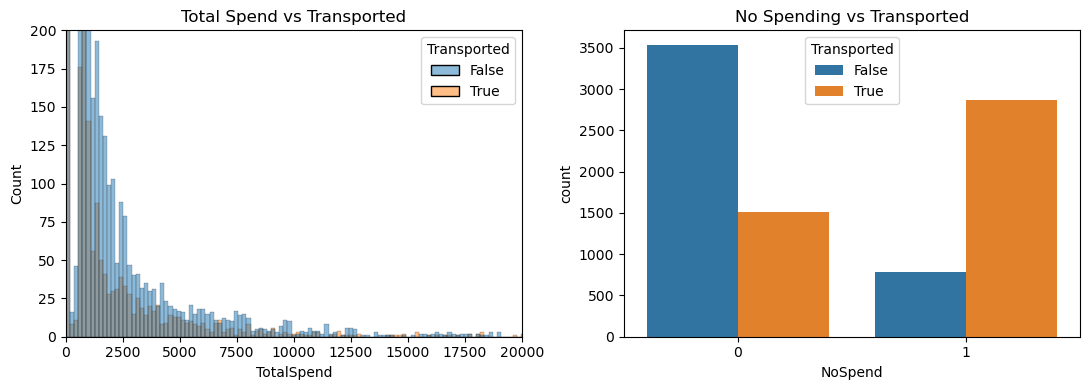

In [18]:
for dataset in data_cleaner: 
    dataset['TotalSpend']=dataset[exp_feats].sum(axis=1)
    dataset['NoSpend']=(dataset['TotalSpend']==0).astype(int)

# Plot distribution of new features
fig=plt.figure(figsize=(11,4))
plt.subplot(1,2,1)
sns.histplot(data=data1, x='TotalSpend', hue='Transported', bins=200)
plt.title('Total Spend vs Transported')
plt.ylim([0,200])
plt.xlim([0,20000])

plt.subplot(1,2,2)
sns.countplot(data=data1, x='NoSpend', hue='Transported')
plt.title('No Spending vs Transported')
fig.tight_layout()
plt.show();

- Ghi chú:
  * Những hành khách không chi tiêu tỉ lệ bị dịch chuyển cao hơn
  * Những hành khách chi tiều nhiều thì có tỉ lệ bị dịch chuyển cao

### Age

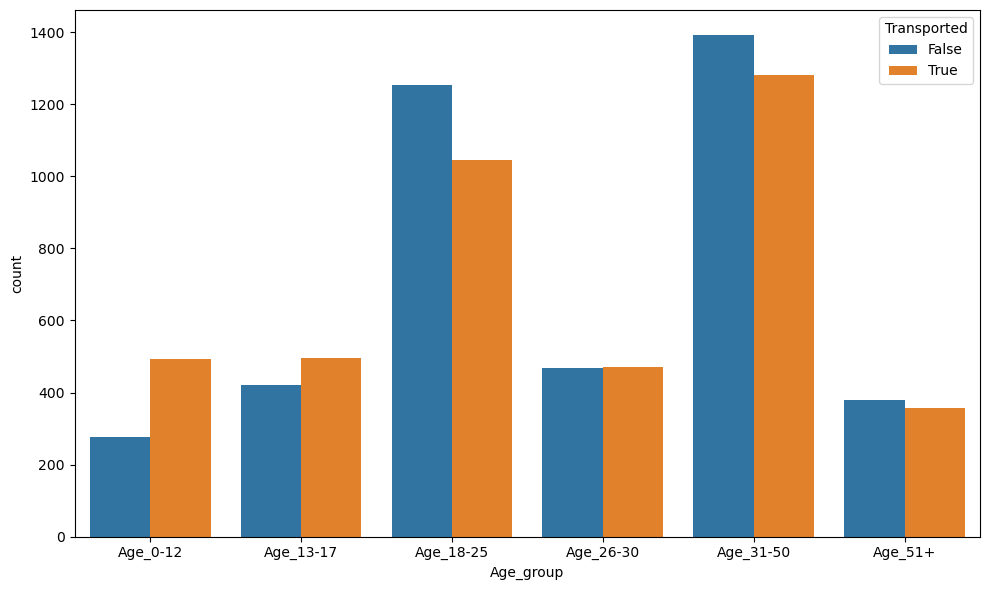

In [19]:
bins = [0,13,18,26,30,50,80]
for data in data_cleaner:
    data["Age_group"] = pd.cut(x=data['Age'],bins = bins,labels=['Age_0-12','Age_13-17','Age_18-25','Age_26-30','Age_31-50','Age_51+'])

fig = plt.figure(figsize=(10,6))
sns.countplot(data = data1,x='Age_group',hue='Transported')
fig.tight_layout()
plt.legend(title = "Transported",loc='best')
plt.show();

- Ghi chú:
  * Hành khách thuộc nhóm từ 0 - 17 bạn rất dể bị dịch chuyển

### PassengerId

In [20]:
for dataset in data_cleaner: 
    dataset['Group'] = dataset['PassengerId'].apply(lambda x: x.split('_')[0]).astype(int)
    dataset['GroupSize']=dataset['Group'].map(lambda x: dataset['Group'].value_counts()[x])



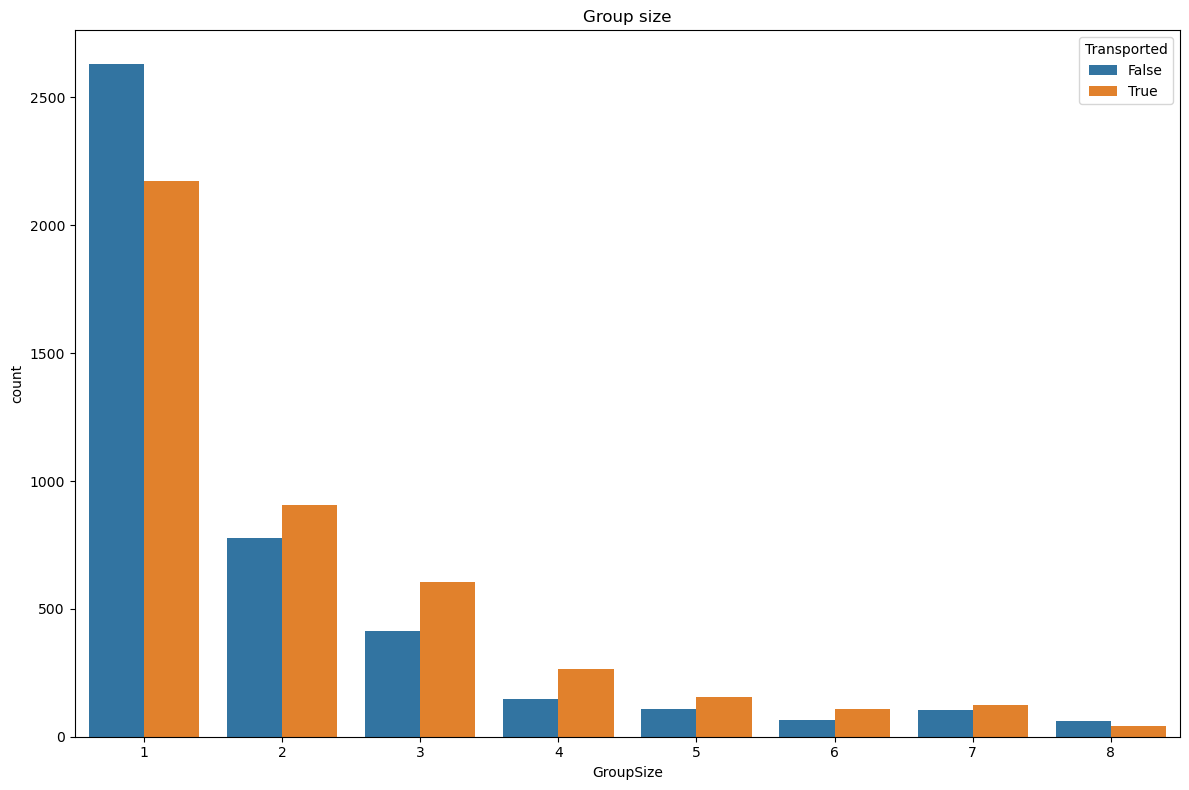

In [21]:
fig = plt.figure(figsize=(12,8))
sns.countplot(data=data1, x='GroupSize', hue='Transported')
plt.title('Group size')
fig.tight_layout()
plt.show();

- Ghi chú:
  * Những hành khách đi theo nhóm càng đông thì tỉ lệ bị dịch chuyển cao hơn

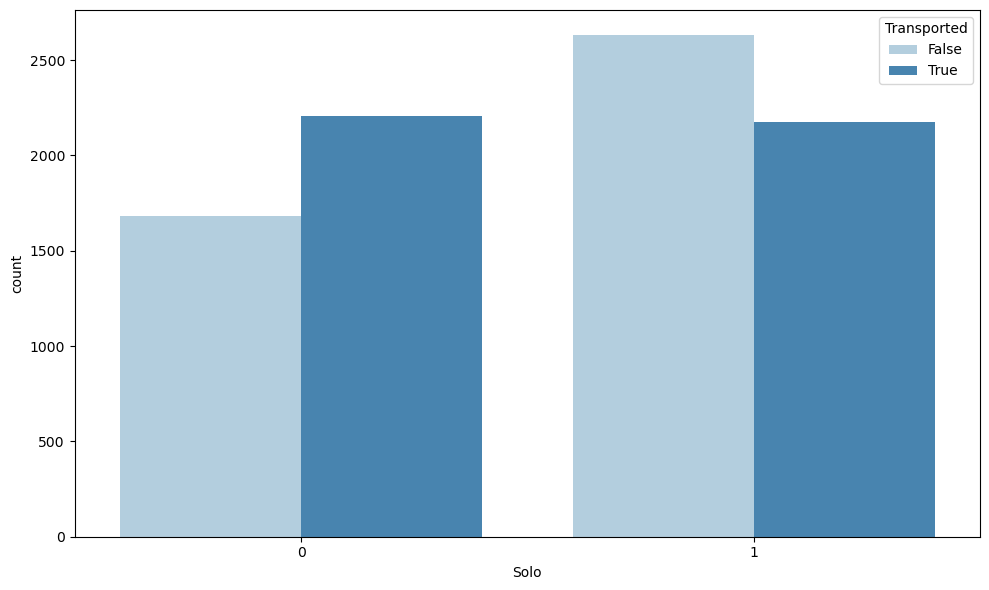

In [22]:
for data in data_cleaner:
    data['Solo'] = (data['GroupSize'] == 1).astype("int")
fig = plt.figure(figsize=(10,6))
sns.countplot(data = data1,x='Solo',hue='Transported',palette='Blues')
fig.tight_layout()
plt.show();

- Ghi chú:
  * Hành khách đi du lịch 1 mình tỉ lệ bị dịch chuyển thấp hơn

In [23]:
for data in data_cleaner:
    data['Cabin'].fillna('Z/999/Z',inplace=True)
    data["Deck"] = data["Cabin"].apply(lambda x:x.split('/')[0])
    data["Num"] = data["Cabin"].apply(lambda x:x.split("/")[1]).astype('int')
    data["Side"] = data["Cabin"].apply(lambda x:x.split('/')[2])
    data.loc[data["Deck"]=='Z','Deck']=np.nan
    data.loc[data["Num"]==999,'Num'] = np.nan
    data.loc[data['Side']=='Z','Side'] = np.nan
    data.drop('Cabin',axis=1,inplace=True)    

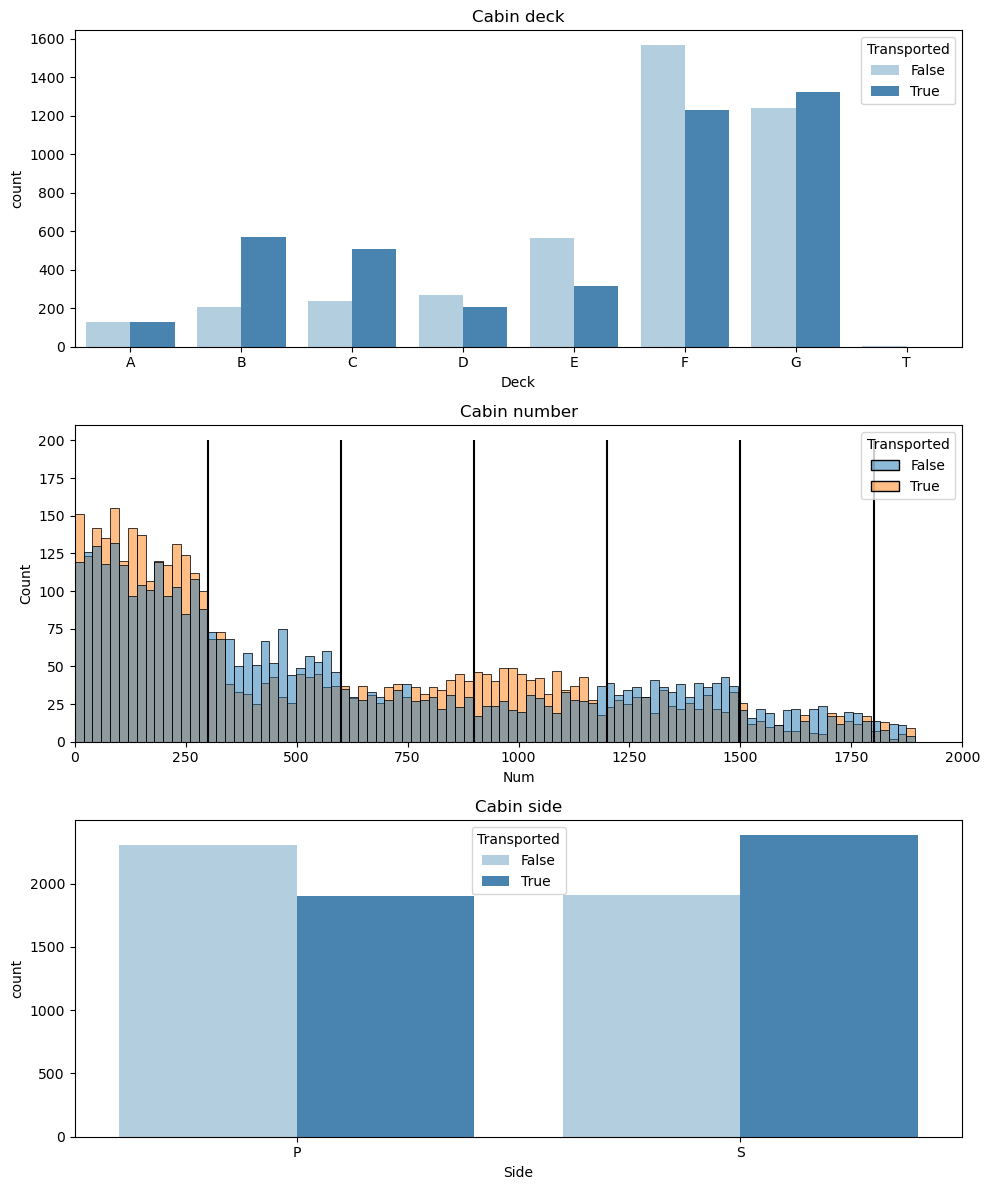

In [24]:
# Plot distribution of new features
fig=plt.figure(figsize=(10,12))
plt.subplot(3,1,1)
sns.countplot(data=data1, x='Deck', hue='Transported',palette='Blues',order=['A','B','C','D','E','F','G','T'])
plt.title('Cabin deck')

plt.subplot(3,1,2)
sns.histplot(data=data1, x='Num', hue='Transported',binwidth=20)
plt.vlines(300, ymin=0, ymax=200, color='black')
plt.vlines(600, ymin=0, ymax=200, color='black')
plt.vlines(900, ymin=0, ymax=200, color='black')
plt.vlines(1200, ymin=0, ymax=200, color='black')
plt.vlines(1500, ymin=0, ymax=200, color='black')
plt.vlines(1800, ymin=0, ymax=200, color='black')
plt.title('Cabin number')
plt.xlim([0,2000])

plt.subplot(3,1,3)
sns.countplot(data=data1, x='Side', hue='Transported',palette='Blues')
plt.title('Cabin side')
fig.tight_layout()
plt.show()

- Ghi chú:
  * Hành khách ở bên S con tàu có tỉ lệ bị dịch chuyển cao hơn
  * Hành khách ở toa tàu B,C,G có tỉ lệ bị dịch chuyển cao hơn
  * Hành khách ở phòn từ 0 - 250,700 - 1200 có tỉ lệ bị dịch chuyên cao hơn


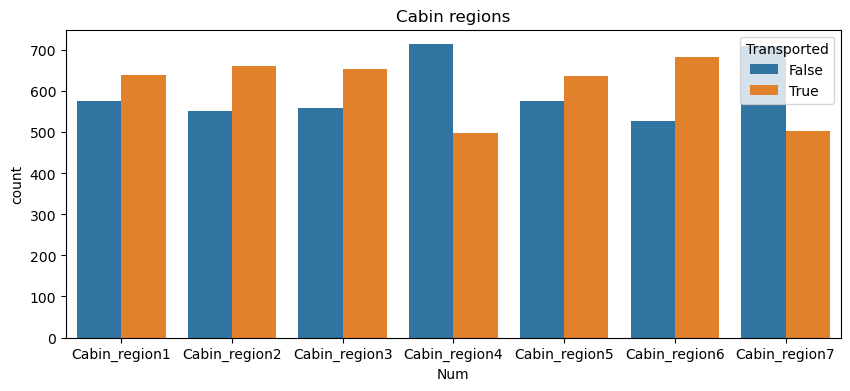

In [25]:
# Plot distribution of new features
labels = ['Cabin_region1','Cabin_region2','Cabin_region3','Cabin_region4','Cabin_region5','Cabin_region6','Cabin_region7']
plt.figure(figsize=(10,4))
Cabin_regions_plot= pd.qcut(x=data1['Num'],q = 7,labels = labels)
sns.countplot(x=Cabin_regions_plot, hue=data1['Transported'])
plt.title('Cabin regions')
plt.show()

In [26]:
for data in data_cleaner:
    labels = ['Cabin_region1','Cabin_region2','Cabin_region3','Cabin_region4','Cabin_region5','Cabin_region6','Cabin_region7']
    plt.figure(figsize=(10,4))
    data1['Cabin_regions_plot']= pd.qcut(x=data1['Num'],q = 7,labels = labels)

<Figure size 1000x400 with 0 Axes>

<Figure size 1000x400 with 0 Axes>

### Family

In [27]:
for data in data_cleaner:
    data['Name'].fillna('Unknown Unknown',inplace=True)
    data['Surname'] = data['Name'].str.split().str[-1]
    data["Family_size"] = data['Surname'].map(lambda x:data["Surname"].value_counts()[x])
    data.loc[data['Surname']=='Unknown','Surname'] = np.nan
    data.loc[data["Family_size"]>100,'Family_size'] = 0
    data.drop("Name",axis=1,inplace=True)

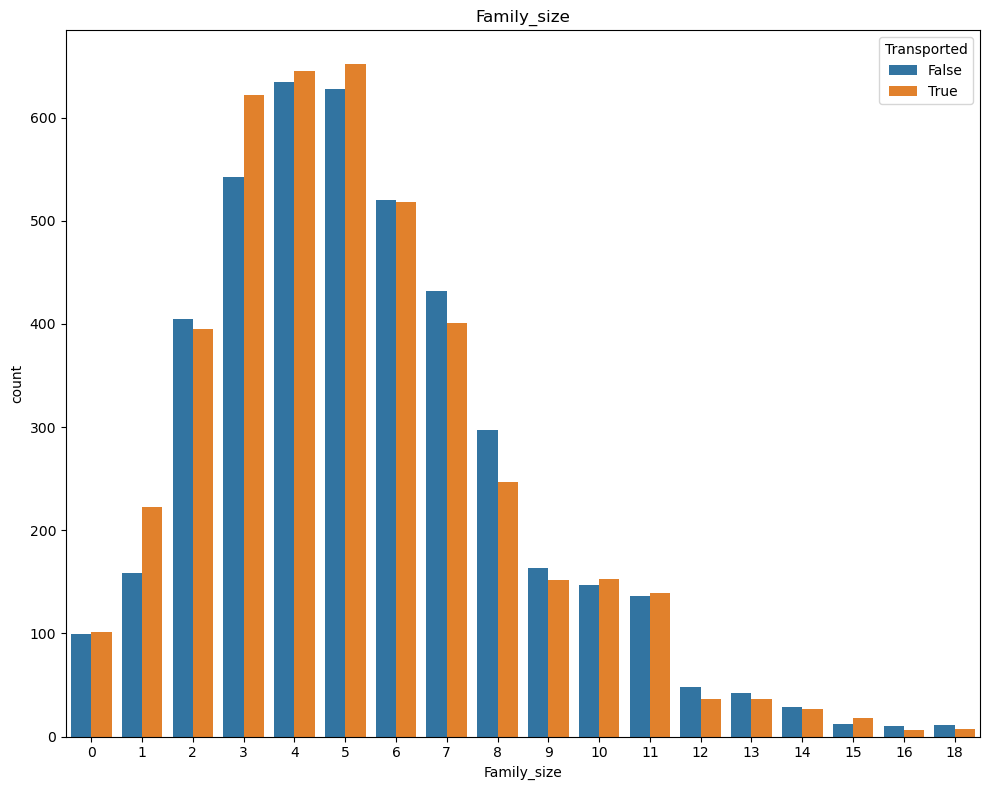

In [28]:
fig = plt.figure(figsize=(10,8))
sns.countplot(data = data1,x='Family_size',hue ='Transported')
plt.title("Family_size")
plt.tight_layout()
plt.show();

#### Mối quan hệ của HomePlanet và Deck

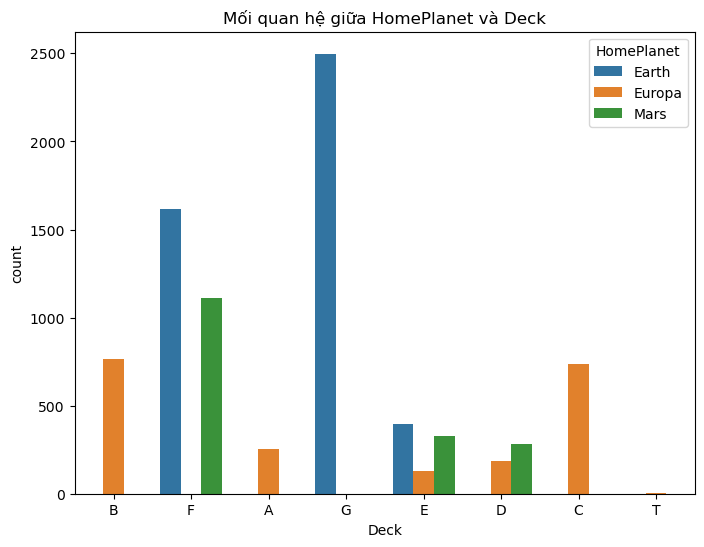

In [29]:
fig = plt.figure(figsize=(8,6))
sns.countplot(data = data1,x='Deck',hue='HomePlanet')
plt.title("Mối quan hệ giữa HomePlanet và Deck")
plt.show()

- Ghi chú:
  * Ở Deck B,A,C,T chỉ tập trung người `Europa`
  * Ở Deck G chỉ tập trung người `Earth`
  * Ở Deck E,D,F tập trùng nhiều chủng loại

### Trực quan hóa dữ liệu `Num` vs `Group` 

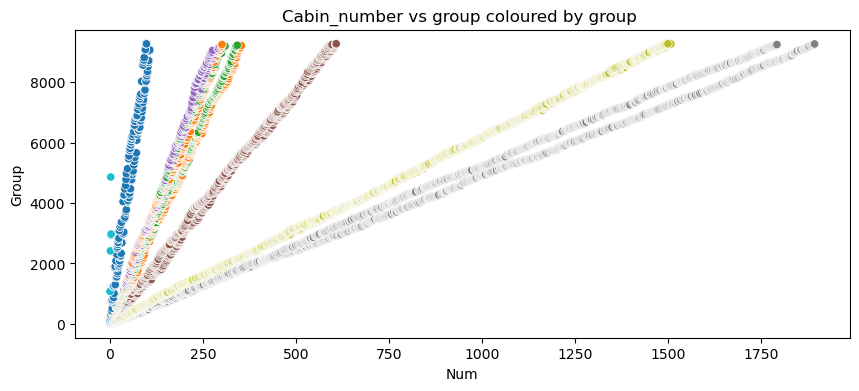

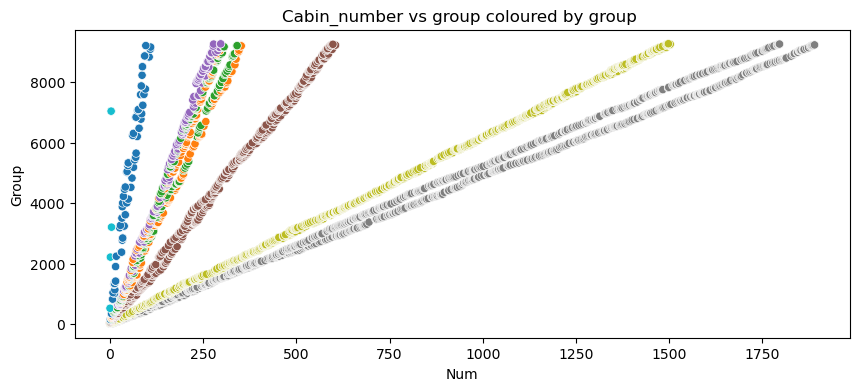

In [30]:
for data in data_cleaner:
    # Scatterplot
    plt.figure(figsize=(10,4))
    sns.scatterplot(x=data['Num'], y=data['Group'], c=LabelEncoder().fit_transform(data.loc[~data['Num'].isna(),'Deck']), cmap='tab10')
    plt.title('Cabin_number vs group coloured by group ')

- Ghi chú:
  *  Hành khách trong cùng một nhóm có Cabin_number gần nhau:

## Bước 5: Tiền sử lí dữ liệu

### Sữ lí dữ liệu bị mất

In [31]:
data1['Transported'].astype(int)

for dataset in data_cleaner:
    # Columns with missing values
    na_cols=dataset.columns[dataset.isna().any()].tolist()
    mv=pd.DataFrame(dataset[na_cols].isna().sum(), columns=['Number_missing'])
    mv['Percentage_missing']=np.round(100*mv['Number_missing']/len(dataset),2)
    print(mv, '\n')
    

                    Number_missing  Percentage_missing
HomePlanet                     201                2.31
CryoSleep                      217                2.50
Destination                    182                2.09
Age                            179                2.06
VIP                            203                2.34
RoomService                    181                2.08
FoodCourt                      183                2.11
ShoppingMall                   208                2.39
Spa                            183                2.11
VRDeck                         188                2.16
Age_group                      357                4.11
Deck                           199                2.29
Num                            205                2.36
Side                           199                2.29
Cabin_regions_plot             205                2.36
Surname                        200                2.30 

              Number_missing  Percentage_missing
HomePlanet    

#### Sữ lí dự liệu bị thiếu `HomePlanet`
- Sữ lí dữ liệu bị miss theo `Group`
- Sữ lí dữ liệu bị miss theo `Deck`
- Sữ lí dữ liệu bị miss theo `Surname`


In [32]:
for data in data_cleaner:
    GHP_nan = data['HomePlanet'].isna()
    HP_bef = GHP_nan.sum()  # Số lượng giá trị NaN trước khi xử lý
    
    # Nhóm dữ liệu theo 'Group' và 'HomePlanet', đếm số lượng xuất hiện
    GHP_gb = data.groupby(['Group', 'HomePlanet']).size().unstack()
    
    # Tìm Group có ít nhất một giá trị khác 0
    valid_groups = GHP_gb[(GHP_gb > 0).any(axis=1)].index

    # Lấy index của các dòng có 'HomePlanet' NaN nhưng có 'Group' hợp lệ
    GHP_index = data.index[GHP_nan & data['Group'].isin(valid_groups)]
    
    # Điền giá trị thiếu bằng HomePlanet phổ biến nhất trong Group tương ứng
    data.loc[GHP_index, 'HomePlanet'] = data.loc[GHP_index, 'Group'].map(lambda x: GHP_gb.idxmax(axis=1)[x] if x in valid_groups else np.nan)

    # Print number of missing values left
    print('#HomePlanet missing values before:', HP_bef)
    print('#HomePlanet missing values after:', data['HomePlanet'].isna().sum())


#HomePlanet missing values before: 201
#HomePlanet missing values after: 111
#HomePlanet missing values before: 87
#HomePlanet missing values after: 46


In [33]:
for data in data_cleaner:
    HP_nan = data['HomePlanet'].isna()
    HP_bef = HP_nan.sum()  # Số lượng giá trị NaN trước khi xử lý
    data.loc[data['HomePlanet'].isna() & data["Deck"].isin(['B', 'A', 'C', 'T']), 'HomePlanet'] = 'Europa'
    data.loc[(HP_nan) & (data["Deck"] == 'G'),'HomePlanet'] = "Earth"
    # Print number of missing values left
    print('#HomePlanet missing values before:', HP_bef)
    print('#HomePlanet missing values after:', data['HomePlanet'].isna().sum())


#HomePlanet missing values before: 111
#HomePlanet missing values after: 63
#HomePlanet missing values before: 46
#HomePlanet missing values after: 31


In [34]:
for data in data_cleaner:
    HP_nan = data['HomePlanet'].isna()
    HP_bef = HP_nan.sum()  # Số lượng giá trị NaN trước khi xử lý
    
    SHP_gb = data.groupby(['Surname', 'HomePlanet']).size().unstack()
    
    valid_groups = SHP_gb[(SHP_gb > 0).any(axis=1)].index

    SHP_index = data.index[GHP_nan & data['Surname'].isin(valid_groups)]
    
    # Điền giá trị thiếu bằng HomePlanet phổ biến nhất trong Group tương ứng
    data.loc[SHP_index, 'HomePlanet'] = data.loc[SHP_index, 'Surname'].map(lambda x: SHP_gb.idxmax(axis=1)[x] if x in valid_groups else np.nan)

    # Print number of missing values left
    print('#HomePlanet missing values before:', HP_bef)
    print('#HomePlanet missing values after:', data['HomePlanet'].isna().sum())


#HomePlanet missing values before: 63
#HomePlanet missing values after: 61
#HomePlanet missing values before: 31
#HomePlanet missing values after: 11


In [35]:
for data in data_cleaner:
    HP_nan = data['HomePlanet'].isna()
    HP_bef = HP_nan.sum()  # Số lượng giá trị NaN trước khi xử lý
    data.loc[(HP_nan) & (data["Deck"] == "D"), 'HomePlanet'] = 'Mars'
    data.loc[(HP_nan) & (data["Deck"] != 'D'),'HomePlanet'] = "Earth"
    # Print number of missing values left
    print('#HomePlanet missing values before:', HP_bef)
    print('#HomePlanet missing values after:', data['HomePlanet'].isna().sum())


#HomePlanet missing values before: 61
#HomePlanet missing values after: 0
#HomePlanet missing values before: 11
#HomePlanet missing values after: 0


#### Xứ lí dữ liệu bị mất `Destination`
- Ghi chú:
  * Chọn nới đến nhiều người tới nhất

In [36]:
for data in data_cleaner:
    D_bef = data['Destination'].isna().sum()
    data.loc[(data['Destination'].isna()),"Destination"] = data["Destination"].mode()[0]
    print('#Destination missing values before',D_bef)
    print("#Destination missing values after",data['Destination'].isna().sum())

#Destination missing values before 182
#Destination missing values after 0
#Destination missing values before 92
#Destination missing values after 0


#### Sữ lí dữ liệu `Surname` và `FamilySize`
- Ghi chú:
  * Xữ lí dữ liệu theo `Group`

In [37]:
for data in data_cleaner:
    sur_bef = data['Surname'].isna().sum()
    GSN_gb = data.loc[data['GroupSize']>1].groupby(['Group','Surname']).size().unstack()
    GSN_index = data.index[data['Surname'].isna() & data['Group'].isin(GSN_gb.index)]
    valid_groups = GSN_gb[(GSN_gb > 0).any(axis=1)].index
    data.loc[GSN_index,'Surname'] = data.loc[GSN_index,'Group'].map(lambda x: GSN_gb.idxmax(axis=1)[x] if x in valid_groups else np.nan)

    print("#Surname missing values before",sur_bef)
    print("#Surname missing values after",data['Surname'].isna().sum())

    #Update family_size
    data['Surname'].fillna('Unknown', inplace=True)
    data["Family_size"] = data['Surname'].map(lambda x:data["Surname"].value_counts()[x])
    data.loc[data['Surname']=='Unknown','Surname'] = np.nan
    data.loc[data["Family_size"]>100,'Family_size'] = 0

#Surname missing values before 200
#Surname missing values after 104
#Surname missing values before 94
#Surname missing values after 51


#### Side sữ lí dữ liệu bị thiếu
- Ghi chú:
  * Sữ lí dữ liệu bị thiếu theo `Group`,`Surname`

In [38]:
for data in data_cleaner:
    
    GCS_gb=data[data['GroupSize']>1].groupby(['Group','Side'])['Side'].size().unstack().fillna(0)

    CS_bef=data['Side'].isna().sum()
    
    valid_groups = GCS_gb[(GCS_gb > 0).any(axis=1)].index
    
    GCS_index=data.index[data['Side'].isna()& data['Group'].isin(GCS_gb.index)]
   
    # Fill corresponding missing values
    data.loc[GCS_index,'Side']=data.loc[GCS_index,"Group"].map(lambda x: GCS_gb.idxmax(axis=1)[x] if x in valid_groups else np.nan)

    # Print number of missing values left
    print('#Cabin_side missing values before:',CS_bef)
    print('#Cabin_side missing values after:',data['Side'].isna().sum())

#Cabin_side missing values before: 199
#Cabin_side missing values after: 99
#Cabin_side missing values before: 100
#Cabin_side missing values after: 63


In [39]:


    
for data in data_cleaner:
    CS_bef=data['Side'].isna().sum()
     # Joint distribution of Surname and Cabin side
    SCS_gb=data[data['GroupSize']>1].groupby(['Surname','Side']).size().unstack();

    valid_groups = SCS_gb[(SCS_gb > 0).any(axis=1)].index
    
    # Passengers with missing Cabin side and in a family with known Cabin side
    SCS_index=data.index[data['Side'].isna() & data["Surname"].isin(valid_groups)]

    # Fill corresponding missing values
    data.loc[SCS_index,'Side']=data.iloc[SCS_index,:]['Surname'].map(lambda x: SCS_gb.idxmax(axis=1)[x] if x in valid_groups else np.nan)

    # Drop surname (we don't need it anymore)
    data.drop('Surname', axis=1, inplace=True)

    # Print number of missing values left
    print('#Cabin_side missing values before:',CS_bef)
    print('#Cabin_side missing values after:',data['Side'].isna().sum())

#Cabin_side missing values before: 99
#Cabin_side missing values after: 52
#Cabin_side missing values before: 63
#Cabin_side missing values after: 45


In [40]:
for data in data_cleaner:

    # Missing values before
    CS_bef=data['Side'].isna().sum()

    # Fill remaining missing values with outlier
    data.loc[data['Side'].isna(),'Side']= data['Side'].mode()[0]

    # Print number of missing values left
    print('#Cabin_side missing values before:',CS_bef)
    print('#Cabin_side missing values after:',data['Side'].isna().sum())

#Cabin_side missing values before: 52
#Cabin_side missing values after: 0
#Cabin_side missing values before: 45
#Cabin_side missing values after: 0


### `Deck` sữ lí dữ liệu bị thiếu
- Ghi chú:
  * Sữ lí dữ liệu dựa trên `Group`
  * Sữ lí dữ liệu dựa trên `HomePlanet`,`Destination`,`Solo`

In [41]:
for data in data_cleaner:
    # Missing values before
    CD_bef=data['Deck'].isna().sum()

    GCD_gb=data[data['GroupSize']>1].groupby(['Group','Deck']).size().unstack()
    
    valid_group = GCD_gb[GCD_gb >0].any(axis=1).index
    # Passengers with missing Cabin deck and in a group with known majority Cabin deck
    GCD_index=data.index[data['Deck'].isna() & data['Group'].isin(valid_group)]

    # Fill corresponding missing values
    data.loc[GCD_index,'Deck']=data.loc[GCD_index,'Group'].map(lambda x: GCD_gb.idxmax(axis=1)[x] if x in valid_group else np.nan)

    # Print number of missing values left
    print('#Cabin_deck missing values before:',CD_bef)
    print('#Cabin_deck missing values after:',data['Deck'].isna().sum())

#Cabin_deck missing values before: 199
#Cabin_deck missing values after: 99
#Cabin_deck missing values before: 100
#Cabin_deck missing values after: 63


In [42]:
for data in data_cleaner:
    # Joint distribution
    data.groupby(['HomePlanet','Destination','Solo','Deck']).size().unstack().fillna(0)
    
    # Missing values before
    CD_bef=data['Deck'].isna().sum()

    # Fill missing values using the mode
    na_rows_CD=data.loc[data['Deck'].isna(),'Deck'].index
    data.loc[data['Deck'].isna(),'Deck']=data.groupby(['HomePlanet','Destination','Solo'])['Deck'].transform(lambda x: x.fillna(pd.Series.mode(x)[0]))[na_rows_CD]

    # Print number of missing values left
    print('#Cabin_deck missing values before:',CD_bef)
    print('#Cabin_deck missing values after:',data['Deck'].isna().sum())

#Cabin_deck missing values before: 99
#Cabin_deck missing values after: 0
#Cabin_deck missing values before: 63
#Cabin_deck missing values after: 0


#### Sữ lí dữ liệu bị thiếu `Num`
- Ghi chú:
  * Sữ lí dữ liệu bằng mô hình máy học `LinearRegression`, dự đoán dựa trên column `Group`

In [43]:
for data in data_cleaner:
    # Missing values before
    CN_bef=data['Num'].isna().sum()
    # Extrapolate linear relationship on a deck by deck basis
    for deck in ['A', 'B', 'C', 'D', 'E', 'F', 'G']:
        # Features and labels
        X_CN=data.loc[~(data['Num'].isna()) & (data['Deck']==deck),'Group']
        y_CN=data.loc[~(data['Num'].isna()) & (data['Deck']==deck),'Num']
        X_test_CN=data.loc[(data['Num'].isna()) & (data['Deck']==deck),'Group']

        if not X_test_CN.empty:
            # Linear regression
            model_CN=sklearn.linear_model.LinearRegression()
            model_CN.fit(X_CN.values.reshape(-1, 1), y_CN)
            preds_CN=model_CN.predict(X_test_CN.values.reshape(-1, 1))

            # Fill missing values with predictions
            data.loc[(data['Num'].isna()) & (data['Deck']==deck),'Num']=preds_CN.astype(int)

    # Print number of missing values left
    print('#Cabin_number missing values before:',CN_bef)
    print('#Cabin_number missing values after:',data['Num'].isna().sum())


#Cabin_number missing values before: 205
#Cabin_number missing values after: 0
#Cabin_number missing values before: 100
#Cabin_number missing values after: 0


In [44]:
for data in data_cleaner:
    labels = ['Cabin_region1','Cabin_region2','Cabin_region3','Cabin_region4','Cabin_region5','Cabin_region6','Cabin_region7']
    data['Cabin_regions_plot']= pd.qcut(x=data['Num'],q = 7,labels = labels)

### Sữ lí dữ liệu biết thiếu `VIP`

In [45]:
for data in data_cleaner:
    # Missing values before
    V_bef=data['VIP'].isna().sum()

    # Fill missing values with mode
    data.loc[data['VIP'].isna(),'VIP']=data['VIP'].mode()[0]

    # Print number of missing values left
    print('#VIP missing values before:',V_bef)
    print('#VIP missing values after:',data['VIP'].isna().sum())

#VIP missing values before: 203
#VIP missing values after: 0
#VIP missing values before: 93
#VIP missing values after: 0


### Sữ lí dự liệu bị thiếu `Age` và `Group_Age`
- Ghi chú:
  * Sữ lí dữ liệu theo nhóm `HomePlanet`,`NoSpend`,`Solo` và điện giá trị trung bình của `Age`

In [46]:
for data in data_cleaner:
    # Missing values before
    A_bef= data["Age"].isna().sum()

    # Fill missing values using the median
    na_rows_A=data.index[data["Age"].isna()]
    data.loc[data['Age'].isna(),'Age']=data.groupby(['HomePlanet','NoSpend','Solo','Deck'])['Age'].transform(lambda x: x.fillna(x.median()))[na_rows_A]

    # Print number of missing values left
    print('#Age missing values before:',A_bef)
    print('#Age missing values after:',data['Age'].isna().sum())

#Age missing values before: 179
#Age missing values after: 0
#Age missing values before: 91
#Age missing values after: 0


In [47]:
for data in data_cleaner:
    bins = [-1,13,18,26,30,50,80]
    data["Age_group"] = pd.cut(x=data['Age'],bins = bins,labels=['Age_0-12','Age_13-17','Age_18-25','Age_26-30','Age_31-50','Age_51+'])

### Sữ lí dữ liệu thông qua `NoSpend`
- Ghi chú:
  * Những người nào sài tiền thì chắc chắc 100% không ngủ đông

In [48]:
for data in data_cleaner:
    # Missing values before
    CSL_bef=data['CryoSleep'].isna().sum()

    # Fill missing values using the mode
    na_rows_CSL=data.index[data['CryoSleep'].isna()]
    data.loc[data['CryoSleep'].isna(),'CryoSleep']=data.groupby(['NoSpend'])['CryoSleep'].transform(lambda x: x.fillna(pd.Series.mode(x)[0]))[na_rows_CSL]

    # Print number of missing values left
    print('#CryoSleep missing values before:',CSL_bef)
    print('#CryoSleep missing values after:',data['CryoSleep'].isna().sum())

#CryoSleep missing values before: 217
#CryoSleep missing values after: 0
#CryoSleep missing values before: 93
#CryoSleep missing values after: 0


### Sữ lí dữ liệu thị thiếu `exp_feats`
- Ghi chú:
  * Thông qua người đó có ở trong trạng thái ngủ đông hay không nếu ngủ đông thì 100% ko sài tiền
  * Điền dữ liệu thông qua `HomePlanet`,`Solo`,`Age_group`

In [49]:
for data in data_cleaner:
    # Missing values before
    E_bef=data[exp_feats].isna().sum().sum()

    # CryoSleep has no expenditure
    for col in exp_feats:
        data.loc[(data[col].isna()) & (data['CryoSleep']==True), col]=0

    # Print number of missing values left
    print('#Expenditure missing values before:',E_bef)
    print('#Expenditure missing values after:',data[exp_feats].isna().sum().sum())

#Expenditure missing values before: 943
#Expenditure missing values after: 571
#Expenditure missing values before: 467
#Expenditure missing values after: 295


In [50]:
for data in data_cleaner:
    # Missing values before
    E_bef=data[exp_feats].isna().sum().sum()

    # Fill remaining missing values using the median
    for col in exp_feats:
        na_rows=data.index[data[col].isna()]
        data.loc[data[col].isna(),col]=data.groupby(['HomePlanet','Solo','Age_group'])[col].transform(lambda x: x.fillna(x.mean()))[na_rows]

    # Print number of missing values left
    print('#Expenditure missing values before:',E_bef)
    print('#Expenditure missing values after:',data[exp_feats].isna().sum().sum())

#Expenditure missing values before: 571
#Expenditure missing values after: 0
#Expenditure missing values before: 295
#Expenditure missing values after: 0


In [51]:
for data in data_cleaner:
    # Update expenditure and no_spending
    data['TotalSpend']=data[exp_feats].sum(axis=1)
    data['NoSpend']=(data['TotalSpend']==0).astype(int)
    data.isna().sum()
    # Apply log transform
    for col in ['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck','TotalSpend']:
        data[col]=np.log(1+data[col])

In [52]:
data1.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Destination', 'Age', 'VIP',
       'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Transported', 'TotalSpend', 'NoSpend', 'Age_group', 'Group',
       'GroupSize', 'Solo', 'Deck', 'Num', 'Side', 'Cabin_regions_plot',
       'Family_size'],
      dtype='object')

### Chuẩn hóa dữ liệu

In [53]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   PassengerId         8693 non-null   object  
 1   HomePlanet          8693 non-null   category
 2   CryoSleep           8693 non-null   category
 3   Destination         8693 non-null   category
 4   Age                 8693 non-null   float64 
 5   VIP                 8693 non-null   category
 6   RoomService         8693 non-null   float64 
 7   FoodCourt           8693 non-null   float64 
 8   ShoppingMall        8693 non-null   float64 
 9   Spa                 8693 non-null   float64 
 10  VRDeck              8693 non-null   float64 
 11  Transported         8693 non-null   bool    
 12  TotalSpend          8693 non-null   float64 
 13  NoSpend             8693 non-null   int32   
 14  Age_group           8693 non-null   category
 15  Group               8693 non-null   in

In [54]:
cat_features = ["HomePlanet","Destination","VIP","CryoSleep",'Cabin_regions_plot','Side','NoSpend','Age_group','Solo','Deck']
num_features = ['Age','RoomService','FoodCourt','ShoppingMall','Spa','VRDeck','TotalSpend',"Group",'Num','Family_size']
target = 'Transported'

In [55]:
for data in data_cleaner:
    convert_cat(data,cat_features)
data1[target] = data1[target].astype('int')

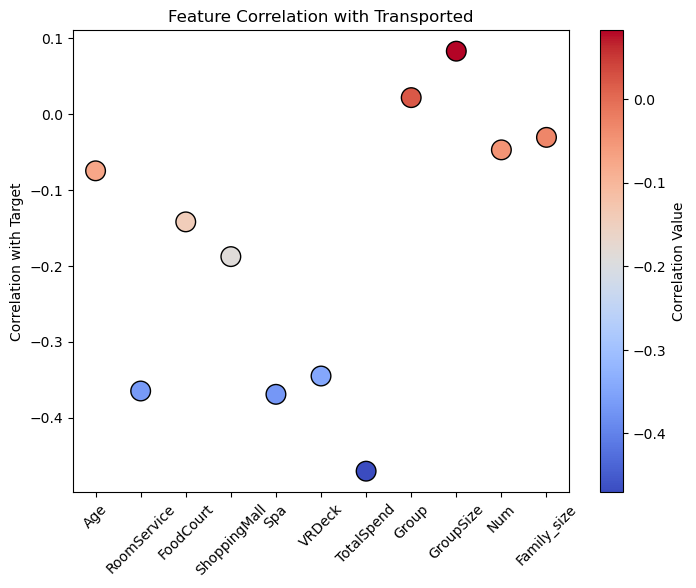

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

def correlation_with_target(df, target_col):
    corr_matrix = df.corr()
    target_corr = corr_matrix[target_col].drop(target_col)  

    plt.figure(figsize=(8, 6))
    scatter = plt.scatter(target_corr.index, target_corr.values, 
                          c=target_corr.values, cmap="coolwarm", edgecolor='k', s=200)
    
    plt.xticks(rotation=45)
    plt.ylabel("Correlation with Target")
    plt.title(f"Feature Correlation with {target_col}")

    # Thêm colorbar
    cbar = plt.colorbar(scatter)
    cbar.set_label("Correlation Value")
    
    plt.show()

# Gọi hàm với target của bạn
correlation_with_target(data1.select_dtypes(np.number), target)


- Ghi chú:
  * Những features ảnh hưởng tới target là `RoomService`,`Spa`,`VRDeck`,`TotalSpend`

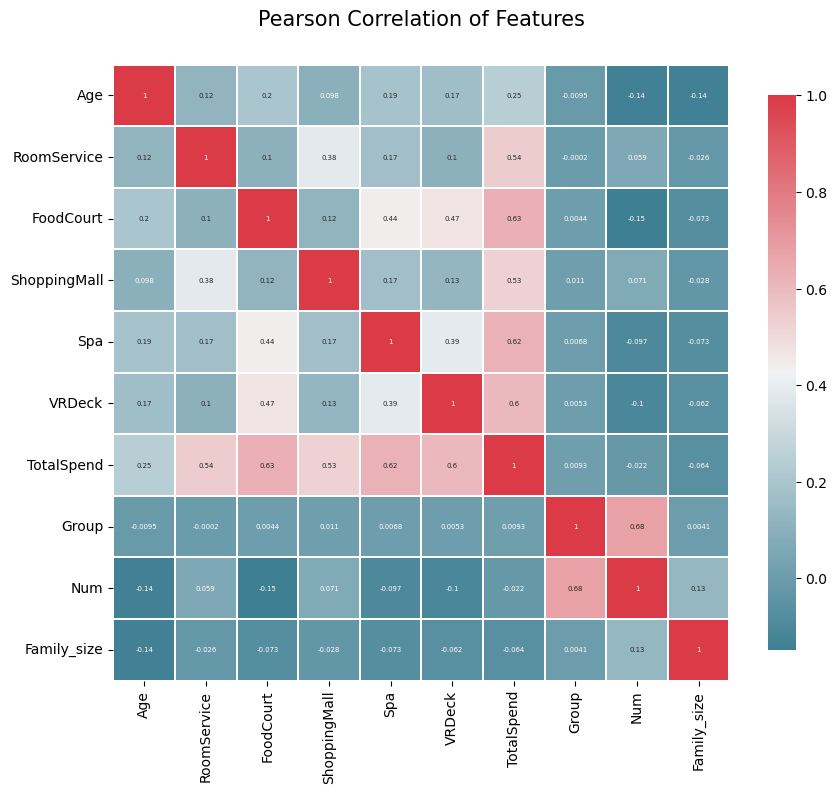

In [57]:
#correlation heatmap of dataset
def correlation_heatmap(df):
    _ , ax = plt.subplots(figsize = (10, 8))
    colormap = sns.diverging_palette(220, 10, as_cmap = True)
    
    _ = sns.heatmap(
        df.corr(), 
        cmap = colormap,
        square=True, 
        cbar_kws={'shrink':.9 }, 
        ax=ax,
        annot=True, 
        linewidths=0.1,vmax=1.0, linecolor='white',
        annot_kws={'fontsize': 5 }
    )
    
    plt.title('Pearson Correlation of Features', y=1.05, size=15)

correlation_heatmap(data1[num_features])

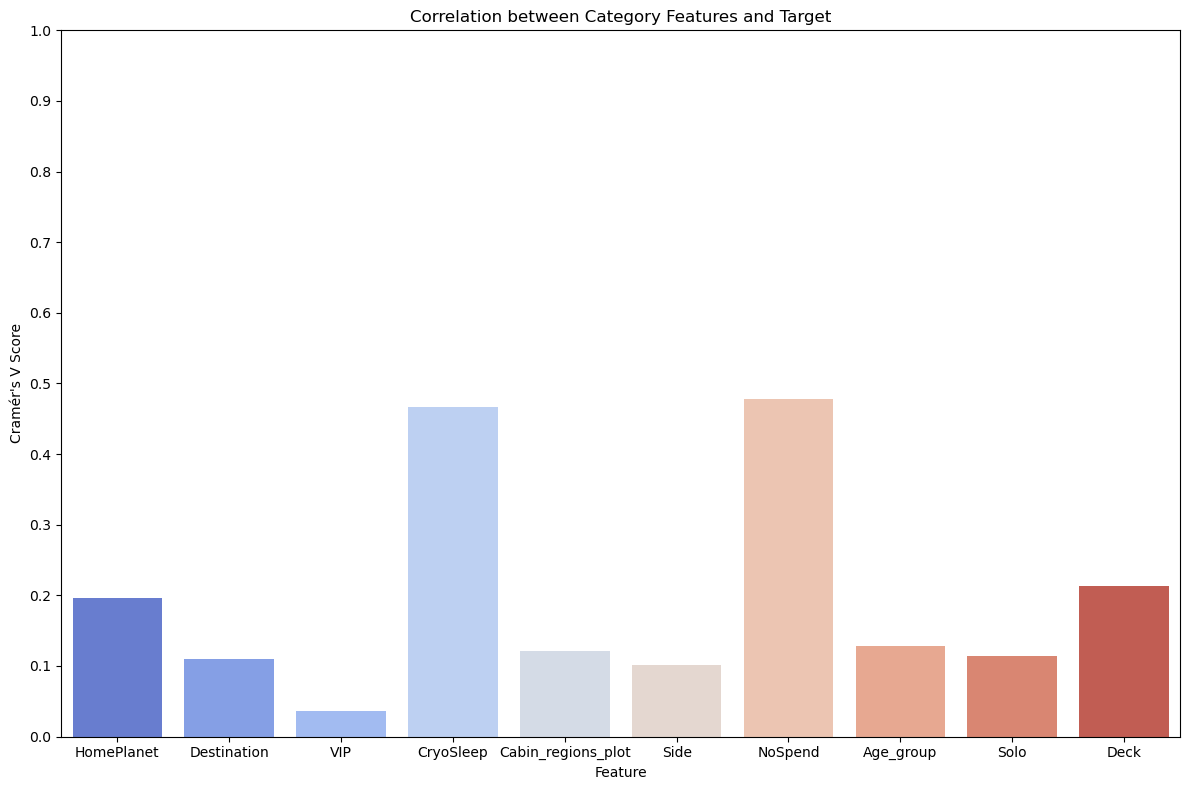

In [58]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
import numpy as np

# Hàm tính Cramér's V
def cramers_v(cat1, cat2):
    confusion_matrix = pd.crosstab(cat1, cat2)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r, k = confusion_matrix.shape
    return np.sqrt(phi2 / min(r-1, k-1))

# Tính Cramér’s V cho từng feature với target
cramers_v_scores = {feature: cramers_v(data1[feature], data1[target]) for feature in cat_features}

# Chuyển kết quả sang DataFrame
cramers_v_df = pd.DataFrame(cramers_v_scores.items(), columns=["Feature", "Cramér's V"])

# Vẽ biểu đồ
plt.figure(figsize=(12,8))
sns.barplot(x="Feature", y="Cramér's V", data=cramers_v_df, palette="coolwarm")
# Chỉnh tần suất trục y
plt.yticks(np.arange(0, 1.1, 0.1))  # Đặt mốc từ 0 đến 1 với bước nhảy 0.1
plt.ylabel("Cramér's V Score")
plt.title("Correlation between Category Features and Target")
plt.ylim(0,1)  # Vì Cramér's V luôn từ 0 đến 1
plt.tight_layout()
plt.show()


- Ghi chú:
  * Một số cột ảnh hưởng rất yếu đến target `HomePlanet`,`Destination`,`VIP`,`Cabin_regions_plot`,`Side`,`Age_group`,`Solo`
  * Một số cột ảnh hưởng mạnh đánh chú ý: `CryoSleep`,`NoSpend`,`Deck`

In [59]:
cat_features = ["CryoSleep",'NoSpend','Deck','HomePlanet']
num_features = ['TotalSpend','Spa','RoomService','VRDeck','FoodCourt','ShoppingMall']
features = cat_features + num_features
X = data1[features]
y = data1[target]
X_test = data_val[features]

In [60]:
# preprocess pipeline
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

num_transformer = Pipeline(steps = [
    ("scaler",StandardScaler())
])

cat_transformer = Pipeline(steps = [
    ("encoder",OneHotEncoder(handle_unknown = "ignore"))
])

In [61]:
preprocessor = ColumnTransformer(transformers=[
    ('num',num_transformer,num_features),
    ('cat',cat_transformer,cat_features)
])

In [62]:
datax = preprocessor.fit_transform(X)
datax_test = preprocessor.fit_transform(X_test)

In [63]:
print('Train columns with null values: \n', data1.isnull().sum())
print("-"*10)

print('Test/Validation columns with null values: \n', data_val.isnull().sum())

Train columns with null values: 
 PassengerId           0
HomePlanet            0
CryoSleep             0
Destination           0
Age                   0
VIP                   0
RoomService           0
FoodCourt             0
ShoppingMall          0
Spa                   0
VRDeck                0
Transported           0
TotalSpend            0
NoSpend               0
Age_group             0
Group                 0
GroupSize             0
Solo                  0
Deck                  0
Num                   0
Side                  0
Cabin_regions_plot    0
Family_size           0
dtype: int64
----------
Test/Validation columns with null values: 
 PassengerId           0
HomePlanet            0
CryoSleep             0
Destination           0
Age                   0
VIP                   0
RoomService           0
FoodCourt             0
ShoppingMall          0
Spa                   0
VRDeck                0
TotalSpend            0
NoSpend               0
Age_group             0
Group     

## Bước 6: Huấn luyện model

In [64]:
#split train and test data with function defaults
#random_state -> seed or control random number generator: https://www.quora.com/What-is-seed-in-random-number-generation
X_train, X_val, y_train, y_val = model_selection.train_test_split(datax, y, random_state = 0)

print("Train1 Shape: {}".format(X_train.shape))
print("Test1 Shape: {}".format(X_val.shape))
print(X_train.shape,y_train.shape)

Train1 Shape: (6519, 21)
Test1 Shape: (2174, 21)
(6519, 21) (6519,)


In [ ]:
data1[target]

In [65]:
#Machine Learning Algorithm (MLA) Selection and Initialization
MLA = [
    #Ensemble Methods
    ensemble.GradientBoostingClassifier(),
    ensemble.RandomForestClassifier(),
    
    #GLM
    linear_model.LogisticRegressionCV(),
    linear_model.RidgeClassifierCV(),
    
    #Nearest Neighbor
    neighbors.KNeighborsClassifier(),
    
    #SVM
    svm.SVC(probability=True),
    
    #Trees    
    tree.DecisionTreeClassifier(),
    tree.ExtraTreeClassifier(),
    
    #xgboost: http://xgboost.readthedocs.io/en/latest/model.html
    XGBClassifier()    
    ]

#split dataset in cross-validation with this splitter class: http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.ShuffleSplit.html#sklearn.model_selection.ShuffleSplit
#note: this is an alternative to train_test_split
cv_split = model_selection.ShuffleSplit(n_splits = 10, test_size = .3, train_size = .7, random_state = 0 ) # run model 10x with 60/30 split intentionally leaving out 10%

#create table to compare MLA metrics
MLA_columns = ['MLA Name', 'MLA Parameters','MLA Train Accuracy Mean', 'MLA Test Accuracy Mean', 'MLA Test Accuracy 3*STD' ,'MLA Time']
MLA_compare = pd.DataFrame(columns = MLA_columns)

#create table to compare MLA predictions
MLA_predict = data1[target]

#index through MLA and save performance to table
row_index = 0
for alg in MLA:

    #set name and parameters
    MLA_name = alg.__class__.__name__
    MLA_compare.loc[row_index, 'MLA Name'] = MLA_name
    MLA_compare.loc[row_index, 'MLA Parameters'] = str(alg.get_params())
    
    #score model with cross validation: http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html#sklearn.model_selection.cross_validate
    cv_results = model_selection.cross_validate(alg, X_train, y_train, cv  = cv_split, return_train_score=True )

    MLA_compare.loc[row_index, 'MLA Time'] = cv_results['fit_time'].mean()
    MLA_compare.loc[row_index, 'MLA Train Accuracy Mean'] = cv_results['train_score'].mean()
    MLA_compare.loc[row_index, 'MLA Test Accuracy Mean'] = cv_results['test_score'].mean()   
    #if this is a non-bias random sample, then +/-3 standard deviations (std) from the mean, should statistically capture 99.7% of the subsets
    MLA_compare.loc[row_index, 'MLA Test Accuracy 3*STD'] = cv_results['test_score'].std()*3   #let's know the worst that can happen!
    

    #save MLA predictions - see section 6 for usage
    alg.fit(X_train, y_train)
    MLA_predict[MLA_name] = alg.predict(X_val)
    
    row_index+=1
    
#print and sort table: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.sort_values.html
MLA_compare.sort_values(by = ['MLA Test Accuracy Mean'], ascending = False, inplace = True)
MLA_compare
#MLA_predict

,MLA Name,MLA Parameters,MLA Train Accuracy Mean,MLA Test Accuracy Mean,MLA Test Accuracy 3*STD,MLA Time
5,SVC,"{'C': 1.0, 'break_ties': False, 'cache_size': ...",0.804383,0.794121,0.017407,4.413239
0,GradientBoostingClassifier,"{'ccp_alpha': 0.0, 'criterion': 'friedman_mse'...",0.818935,0.792894,0.019076,0.793361
1,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",0.914749,0.791564,0.020805,0.607399
8,XGBClassifier,"{'objective': 'binary:logistic', 'base_score':...",0.898422,0.787168,0.021208,0.191259
2,LogisticRegressionCV,"{'Cs': 10, 'class_weight': None, 'cv': None, '...",0.775192,0.771115,0.018558,0.320573
3,RidgeClassifierCV,"{'alphas': (0.1, 1.0, 10.0), 'class_weight': N...",0.773899,0.770399,0.015466,0.009113
6,DecisionTreeClassifier,"{'ccp_alpha': 0.0, 'class_weight': None, 'crit...",0.914749,0.749642,0.029359,0.02598
4,KNeighborsClassifier,"{'algorithm': 'auto', 'leaf_size': 30, 'metric...",0.788648,0.743354,0.081115,0.003234
7,ExtraTreeClassifier,"{'ccp_alpha': 0.0, 'class_weight': None, 'crit...",0.914749,0.734969,0.024204,0.006188


Text(0, 0.5, 'Algorithm')

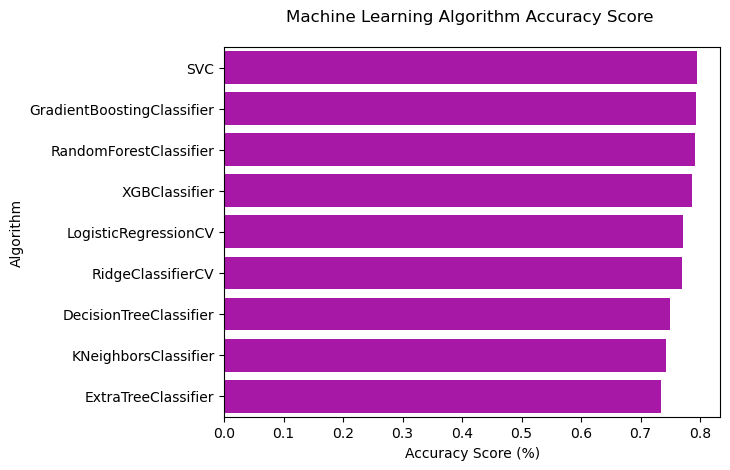

In [66]:
#barplot using https://seaborn.pydata.org/generated/seaborn.barplot.html
sns.barplot(x='MLA Test Accuracy Mean', y = 'MLA Name', data = MLA_compare, color = 'm')

#prettify using pyplot: https://matplotlib.org/api/pyplot_api.html
plt.title('Machine Learning Algorithm Accuracy Score \n')
plt.xlabel('Accuracy Score (%)')
plt.ylabel('Algorithm')

### Tinh chỉnh param model

In [67]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score

# 1. Mô hình Base
base_model = GradientBoostingClassifier(random_state=42)
base_model.fit(X_train, y_train)
y_pred_base = base_model.predict(X_val)
base_acc = accuracy_score(y_val, y_pred_base)
print(f"Base Model Accuracy: {base_acc:.4f}")

# 2. Grid Search để tìm tham số tốt nhất
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(GradientBoostingClassifier(random_state=42), param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# 3. Mô hình tối ưu sau khi tùy chỉnh
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_val)
best_acc = accuracy_score(y_val, y_pred_best)
print(f"Best Model Accuracy: {best_acc:.4f}")
print("Best Hyperparameters:", grid_search.best_params_)

# So sánh
print(f"Accuracy Improvement: {best_acc - base_acc:.4f}")


Base Model Accuracy: 0.7939



KeyboardInterrupt



In [ ]:
import joblib

# Lưu model
joblib.dump(best_model, "model.pkl")

# Load lại model khi cần
loaded_model = joblib.load("model.pkl")


In [ ]:
data1.info()

In [ ]:
# Load lại model khi cần
loaded_model = joblib.load("model.pkl")
data_val['Transported'] = loaded_model.predict(datax_test)
data_val['Transported'] = data_val["Transported"].astype(bool)
data_val[['PassengerId','Transported']].to_csv("submission.csv",index=False)